## Imports

In this notebook, AI was used for:
- solve problems in the code due to syntax
- find the necessary library functions
- plots

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx 
import folium
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import json

import random
import os 

### Exploring the train lines

In [2]:
lines_df = pd.read_csv("data/linie-mit-polygon.csv", delimiter=";") 

lines_df.head()

Geo point  \
0   47.21976912299228, 8.808646167429176   
1    47.18557904508911, 6.91404312078451   
2     47.2030617598106, 8.78192821701766   
3   47.51164288195099, 8.368444732796242   
4  46.980134078491794, 6.827839530302453   

                                           Geo shape TRACK GAUGE   KM START  \
0  {"coordinates": [[8.816764778632129, 47.224802...           N     21.012   
1  {"coordinates": [[6.905882565188336, 47.176839...           M  27771.000   
2  {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
3  {"coordinates": [[8.369558383296539, 47.511128...           N  25185.864   
4  {"coordinates": [[6.813550934223624, 46.968421...           N  10584.900   

      KM END START_OP              START_OP.1 END_OP  \
0   1744.514       RW           Rapperswil SG    HUR   
1  30177.000     BOEC              Le Boéchet   BOIS   
2  34011.375       PF            Pfäffikon SZ   PFOS   
3  25388.895       NW          Niederweningen   NWGE   
4  14060.000     CHNN  Chambrelien Nord (bif)    MML   

                     END_OP.1  Linie                                     Line  
0                      Hurden    671         Rapperswil - Pfäffikon Ost (SOB)  
1                    Les Bois    235                   Tavannes - Le Noirmont  
2     Pfäffikon SZ Ost (Abzw)    720  ZH Langstrasse - Thalwil - Ziegelbrücke  
3  Niederweningen (Gleisende)    761     Oberglatt - Niederweningen Gleisende  
4      Montmollin-Montezillon    224    Chambrelien Nord - Le Locle frontière

In [3]:
lines_df['Geo shape'][0]

'{"coordinates": [[8.816764778632129, 47.224802852486135], [8.816634416211253, 47.22478858845543], [8.81650405385998, 47.224774324277], [8.816373691578317, 47.22476005995085], [8.81624332936631, 47.22474579547701], [8.816112966992074, 47.224731521862275], [8.81598266397298, 47.22471698650613], [8.81585261276117, 47.22470145842973], [8.81572304495625, 47.22468418819479], [8.815594244970244, 47.22466442573283], [8.815466553270781, 47.22464154625077], [8.815340217692906, 47.22461542984136], [8.815215398063588, 47.22458612857493], [8.815092266714924, 47.22455366738476], [8.814970996904195, 47.22451810717796], [8.814851761423869, 47.224479490875595], [8.814734733064853, 47.22443786139949], [8.81462004593864, 47.224393298118144], [8.81450789923527, 47.22434584363895], [8.814398413629648, 47.22429556849583], [8.814291762831413, 47.22424255158541], [8.81418809391409, 47.224186863127024], [8.814087553949069, 47.22412857334022], [8.813990264297548, 47.224067779739855], [8.813896216157868, 47.224

<Axes: >

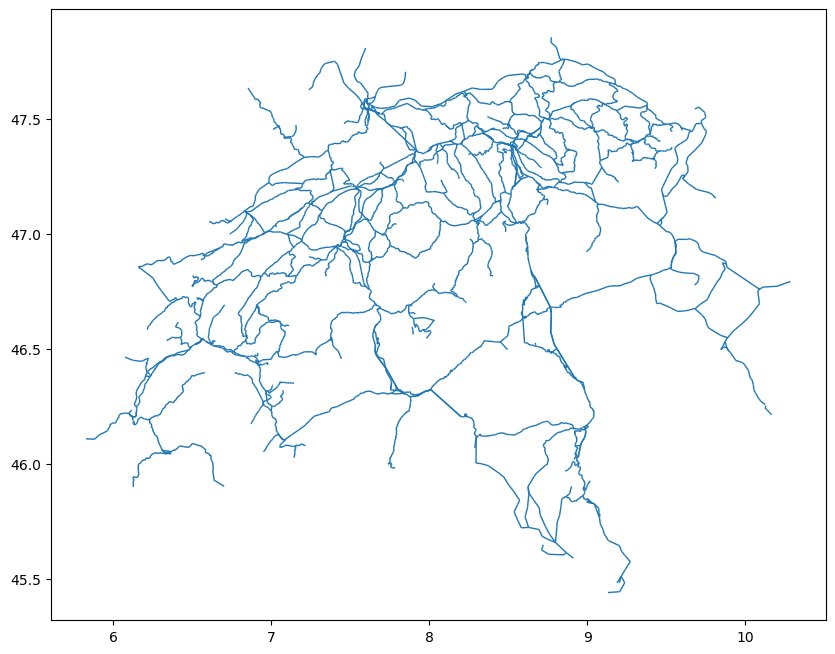

In [4]:
def parse_linestring(geo_shape_str):
    geojson = json.loads(geo_shape_str)
    return LineString(geojson['coordinates'])

lines_df['geometry'] = lines_df['Geo shape'].apply(parse_linestring)

gdf = gpd.GeoDataFrame(lines_df, geometry='geometry', crs="EPSG:4326")

gdf.plot(figsize=(10, 10), linewidth=1)

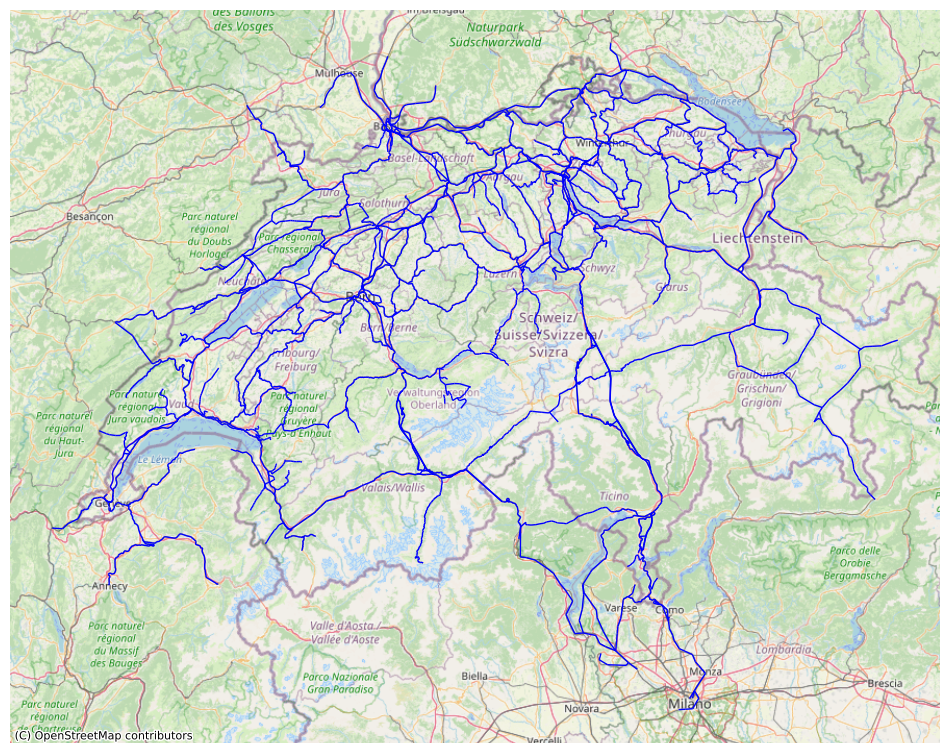

In [5]:
import contextily as ctx
import matplotlib.pyplot as plt

gdf_3857 = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_3857.plot(ax=ax, linewidth=1, edgecolor='blue')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title("")
plt.show()

### Looking at the main train lines connecting our major cities

In [6]:
import re

major_stations = [
    'Bern', 'Basel SBB', 'Lausanne', 'Luzern', 'St. Gallen',
    'Winterthur', 'Zug', 'Aarau', 'Baden', 'Biel/Bienne', 'Chur',
    'Fribourg/Freiburg', 'Genève-Aéroport', 'Genève', 'Neuchâtel',
    'Olten', 'Thun', 'Bellinzona', 'Lugano', 'Lugano Nord',
    'Zürich Oerlikon', 'Zürich HB'
]


In [7]:
lines_df.head()

Geo point  \
0   47.21976912299228, 8.808646167429176   
1    47.18557904508911, 6.91404312078451   
2     47.2030617598106, 8.78192821701766   
3   47.51164288195099, 8.368444732796242   
4  46.980134078491794, 6.827839530302453   

                                           Geo shape TRACK GAUGE   KM START  \
0  {"coordinates": [[8.816764778632129, 47.224802...           N     21.012   
1  {"coordinates": [[6.905882565188336, 47.176839...           M  27771.000   
2  {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
3  {"coordinates": [[8.369558383296539, 47.511128...           N  25185.864   
4  {"coordinates": [[6.813550934223624, 46.968421...           N  10584.900   

      KM END START_OP              START_OP.1 END_OP  \
0   1744.514       RW           Rapperswil SG    HUR   
1  30177.000     BOEC              Le Boéchet   BOIS   
2  34011.375       PF            Pfäffikon SZ   PFOS   
3  25388.895       NW          Niederweningen   NWGE   
4  14060.000     CHNN  Chambrelien Nord (bif)    MML   

                     END_OP.1  Linie                                     Line  \
0                      Hurden    671         Rapperswil - Pfäffikon Ost (SOB)   
1                    Les Bois    235                   Tavannes - Le Noirmont   
2     Pfäffikon SZ Ost (Abzw)    720  ZH Langstrasse - Thalwil - Ziegelbrücke   
3  Niederweningen (Gleisende)    761     Oberglatt - Niederweningen Gleisende   
4      Montmollin-Montezillon    224    Chambrelien Nord - Le Locle frontière   

                                            geometry  
0  LINESTRING (8.816764778632129 47.2248028524861...  
1  LINESTRING (6.905882565188336 47.1768391078522...  
2  LINESTRING (8.778163169450705 47.2032732950830...  
3  LINESTRING (8.369558383296539 47.5111287803333...  
4  LINESTRING (6.813550934223624 46.9684210833008...

In [8]:
#lines_list = [100, 250, 111, 102, 150, 175, 176, 200, 210, 251, 223, 224, 253, 252, 251, 330, 300, 310, 260, 410, 415, 400, 469,470, 500, 460, 230, 226, 225, 450, 540, 700, 720, 722, 651, 653, 710, 720, 660, 890, 900,880,850,751, 752, 595, 580, 600, 290, 650, 700]


### The following are lines that are either InterCity lines or InterRegional lines : (SBB website)
lines_list =[100, 150, 200, 210, 226, 230, 232, 250, 260, 290, 292, 330, 300, 310, 410, 450, 500, 540, 570, 600, 650, 660, 666, 665, 720, 710, 751, 850, 880, 890, 900] 

lines_with_connections = lines_df[lines_df['Linie'].isin(lines_list)]

<Axes: >

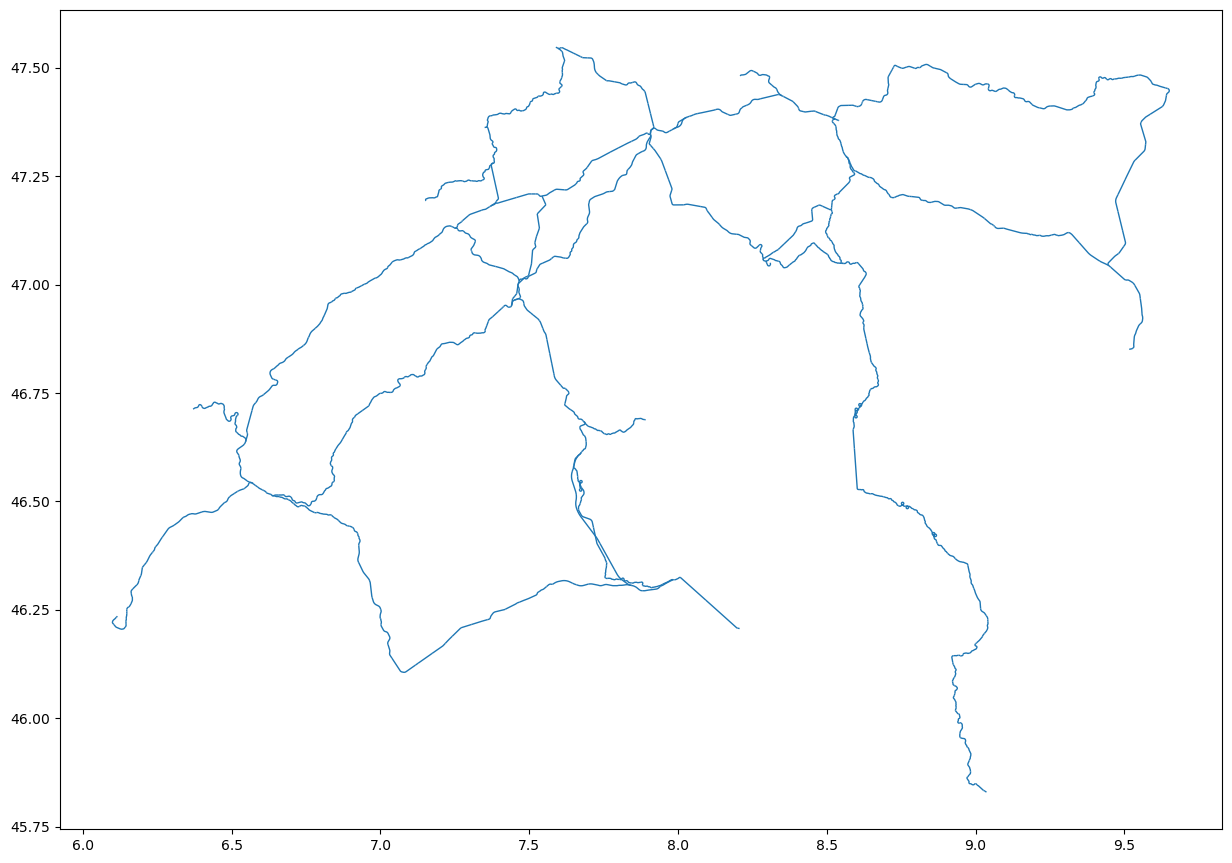

In [9]:
gdf = gpd.GeoDataFrame(lines_with_connections, geometry='geometry', crs="EPSG:4326")
gdf.plot(figsize=(15, 15), linewidth=1)

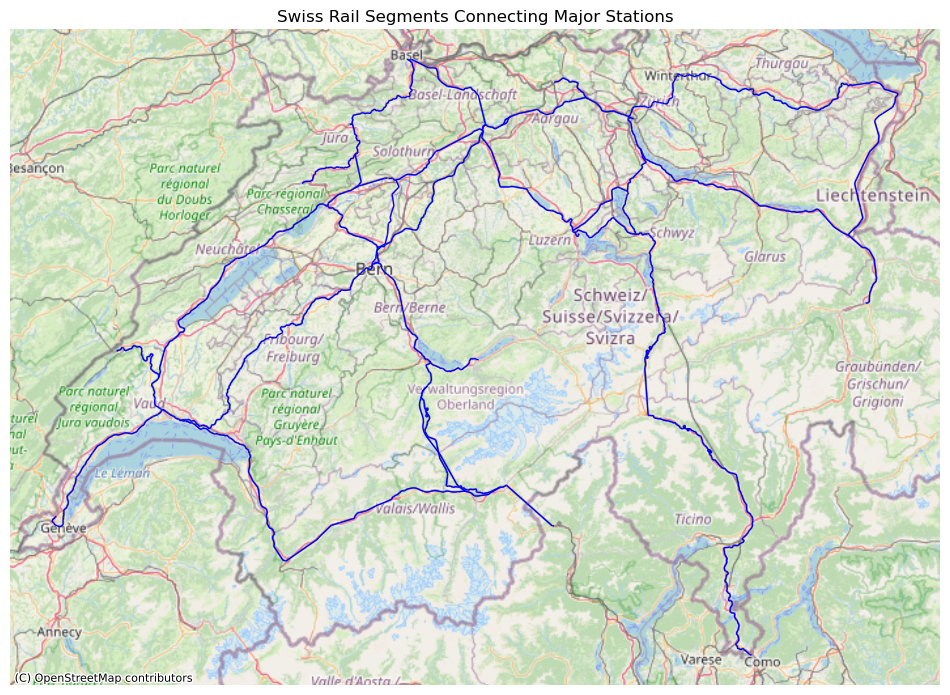

In [10]:
import contextily as ctx
import matplotlib.pyplot as plt

gdf_3857 = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(12, 12))
gdf_3857.plot(ax=ax, linewidth=1, edgecolor='blue')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("Swiss Rail Segments Connecting Major Stations")
plt.show()

### Creating a network with only the main stations

In [11]:
nodes = set(list(lines_with_connections['START_OP.1'].unique()) + list(lines_with_connections['END_OP.1'].unique()))

common_nodes = nodes.intersection(set(major_stations))
#print(set(common_nodes))

only_in_stations = set(major_stations) - set(common_nodes)
print('Missing nodes in our network :', only_in_stations)

Missing nodes in our network : set()


In [12]:
lines_with_connections = lines_with_connections.copy()
lines_with_connections['DISTANCE'] = lines_with_connections['KM END'] - lines_with_connections['KM START']
lines_with_connections.head()

Geo point  \
2     47.2030617598106, 8.78192821701766   
23  47.00934985175391, 7.474511743885728   
59  46.52972611489423, 6.594751442416671   
62  47.32597653390688, 7.831142861718467   
68  47.38996444072213, 8.499420125146317   

                                            Geo shape TRACK GAUGE   KM START  \
2   {"coordinates": [[8.778163169450705, 47.203273...           N  33438.894   
23  {"coordinates": [[7.486112291949321, 47.016873...           M  24370.000   
59  {"coordinates": [[6.602682956893264, 46.526766...           N   2354.000   
62  {"coordinates": [[7.843880612776063, 47.330176...           N  45302.790   
68  {"coordinates": [[8.503689671182817, 47.389008...           N   3019.841   

       KM END START_OP                    START_OP.1 END_OP  \
2   34011.375       PF                  Pfäffikon SZ   PFOS   
23  26850.000     MOSE                   Moosseedorf    ZOL   
59   3757.235     PRMA                 Prilly-Malley   RENB   
62  47447.675      HAE                     Hägendorf    HRK   
68   3695.747     ZHDW  Zürich Hardbrücke West (Spw)   ZASO   

                        END_OP.1  Linie  \
2        Pfäffikon SZ Ost (Abzw)    720   
23                    Zollikofen    292   
59           Renens VD Est (bif)    150   
62                Härkingen Post    410   
68  Zürich Altstetten Ost (Abzw)    710   

                                       Line  \
2   ZH Langstrasse - Thalwil - Ziegelbrücke   
23                     Solothurn - Bern RBS   
59               Lausanne - Genève-Aéroport   
62          Olten - Solothurn - Biel/Bienne   
68                     Zürich HB - Brugg AG   

                                             geometry  DISTANCE  
2   LINESTRING (8.778163169450705 47.2032732950830...   572.481  
23  LINESTRING (7.486112291949321 47.0168737680728...  2480.000  
59  LINESTRING (6.602682956893264 46.5267668848065...  1403.235  
62  LINESTRING (7.843880612776063 47.3301769942711...  2144.885  
68  LINESTRING (8.503689671182817 47.3890081302628...   675.906

#### Noeuds enlevés :

- Uster
- Zurich Stadelhof
- Zurich Enge
- Zurich Hardbrucke
- Zurich Altstetten
- Geneve-eax-vives

In [13]:
df = lines_with_connections

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['START_OP.1'], row['END_OP.1'], weight=row['DISTANCE'])

important_nodes = set(major_stations)
H = nx.Graph()

for source in important_nodes:
    paths = nx.single_source_dijkstra_path(G, source, weight='weight')

    
    for target, path in paths.items():
        if target == source:
            continue

        if len(path) < 2:
            continue
        
        segment = [source]
        for node in path[1:]:
            if node in important_nodes:
                if segment[-1] != node:
                    try:
                        seg_path = nx.shortest_path(G, source=segment[0], target=node, weight='weight')
                        seg_length = nx.path_weight(G, seg_path, weight='weight')
                        H.add_edge(segment[0], node, weight=seg_length)
                    except nx.NetworkXNoPath:
                        pass
                segment = [node]
            else:
                segment.append(node)

In [14]:
import networkx as nx

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['START_OP.1'], row['END_OP.1'], weight=row['DISTANCE'])

important_nodes = set(major_stations)

H = nx.Graph()

for source in important_nodes:
    lengths = nx.single_source_dijkstra_path_length(G, source, weight='weight')
    
    for target in important_nodes:
        if target == source:
            continue
        
        if target in lengths:
            H.add_edge(source, target, weight=lengths[target])

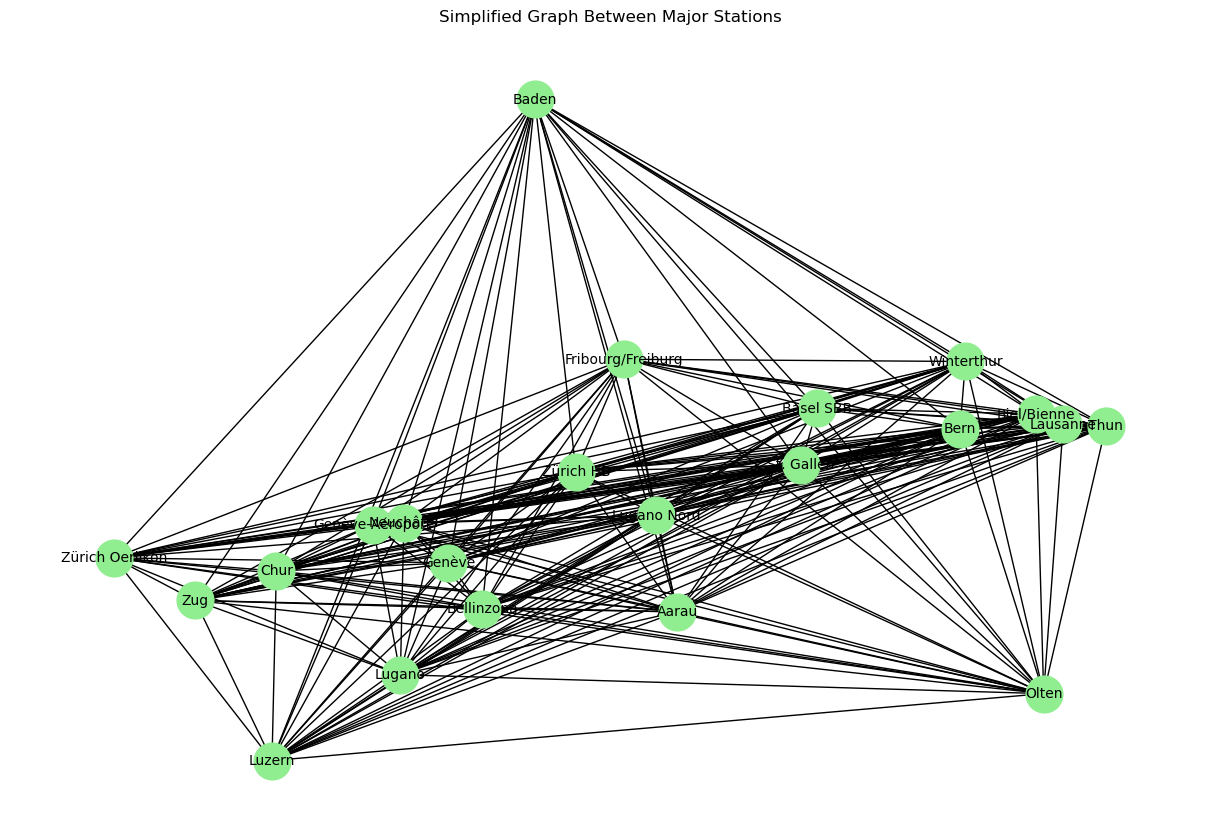

In [15]:
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(H, seed=42)

nx.draw(H, pos, with_labels=True, node_color='lightgreen', node_size=700, font_size=10)

plt.title("Simplified Graph Between Major Stations")
plt.show()

In [16]:
edge_labels = nx.get_edge_attributes(H, 'weight')

edge_data = [
    {'start_node': u, 'end_node': v, 'distance [m]': d['weight']}
    for u, v, d in H.edges(data=True)
]

df_all_links = pd.DataFrame(edge_data)

df_all_links

start_node           end_node  distance [m]
0            Zürich HB               Thun    147993.487
1            Zürich HB          Basel SBB     94038.706
2            Zürich HB              Aarau     41492.905
3            Zürich HB               Bern    120492.589
4            Zürich HB         Winterthur     26787.367
..                 ...                ...           ...
226              Baden  Fribourg/Freiburg    141178.141
227              Baden                Zug     49674.321
228             Lugano  Fribourg/Freiburg    346017.102
229             Lugano                Zug    223345.221
230  Fribourg/Freiburg                Zug    172963.505

[231 rows x 3 columns]

In [17]:
n = len(major_stations)
matrix = np.full((n, n), -1.0)
np.fill_diagonal(matrix, 0)

city_index = {city: i for i, city in enumerate(major_stations)}

for _, row in df_all_links.iterrows():
    u, v, dist = row['start_node'], row['end_node'], row['distance [m]']
    if u in city_index and v in city_index:
        i, j = city_index[u], city_index[v]
        matrix[i, j] = matrix[j, i] = dist

df_all_distances = pd.DataFrame(matrix, index=major_stations, columns=major_stations)

#df_all_distances.to_csv("distance_matrix.csv")
df_all_distances

Bern   Basel SBB    Lausanne      Luzern  St. Gallen  \
Bern                    0.000  104798.677   96888.245  119979.281  202576.446   
Basel SBB          104798.677       0.000  177474.735   94940.490  176122.563   
Lausanne            96888.245  177474.735       0.000  216867.526  299464.691   
Luzern             119979.281   94940.490  216867.526       0.000  139430.850   
St. Gallen         202576.446  176122.563  299464.691  139430.850       0.000   
Winterthur         145437.404  118983.521  242325.649   82291.808   57139.042   
Zug                141853.610  116814.819  238741.855   28417.295  111013.555   
Aarau               78999.684   52545.801  175887.929   69141.497  123576.762   
Baden              110068.246   83614.363  206956.491   78091.616  104671.032   
Biel/Bienne         33461.669   73186.658  104288.077  115838.701  197020.774   
Chur               234725.439  208271.556  331613.684  149820.395  106155.250   
Fribourg/Freiburg   31109.895  135908.572   65778.350  151089.176  233686.341   
Genève-Aéroport    163033.063  233259.129   66144.818  275911.172  357093.245   
Genève             157114.875  227340.941   60226.630  269992.984  351175.057   
Neuchâtel           62661.789  102386.778   75087.957  145038.821  226220.894   
Olten               65626.280   39172.397  162514.525   55768.093  136950.166   
Thun                31264.012  132299.575  128152.257  147480.179  230077.344   
Bellinzona         285352.211  260313.420  382240.456  169866.354  304803.780   
Lugano             314907.207  289868.416  411795.452  199421.350  334358.776   
Lugano Nord        314247.273  289208.482  411135.518  198761.416  333698.842   
Zürich Oerlikon    124018.454   97564.571  220906.699   60872.858   78557.992   
Zürich HB          120492.589   94038.706  217380.834   57346.993   83926.409   

                   Winterthur         Zug       Aarau       Baden  \
Bern               145437.404  141853.610   78999.684  110068.246   
Basel SBB          118983.521  116814.819   52545.801   83614.363   
Lausanne           242325.649  238741.855  175887.929  206956.491   
Luzern              82291.808   28417.295   69141.497   78091.616   
St. Gallen          57139.042  111013.555  123576.762  104671.032   
Winterthur              0.000   53874.513   66437.720   47531.990   
Zug                 53874.513       0.000   68580.051   49674.321   
Aarau               66437.720   68580.051       0.000   31068.562   
Baden               47531.990   49674.321   31068.562       0.000   
Biel/Bienne        139881.732  137713.030   73444.012  104512.574   
Chur               141020.217  121403.100  155725.755  136820.025   
Fribourg/Freiburg  176547.299  172963.505  110109.579  141178.141   
Genève-Aéroport    299954.203  297785.501  233516.483  264585.045   
Genève             294036.015  291867.313  227598.295  258666.857   
Neuchâtel          169081.852  166913.150  102644.132  133712.694   
Olten               79811.124   77642.422   13373.404   44441.966   
Thun               172938.302  169354.508  106500.582  137569.144   
Bellinzona         247664.738  193790.225  234514.427  243464.546   
Lugano             277219.734  223345.221  264069.423  273019.542   
Lugano Nord        276559.800  222685.287  263409.489  272359.608   
Zürich Oerlikon     21418.950   32455.563   45018.770   26113.040   
Zürich HB           26787.367   28929.698   41492.905   22587.175   

                   Biel/Bienne  ...  Genève-Aéroport      Genève   Neuchâtel  \
Bern                 33461.669  ...       163033.063  157114.875   62661.789   
Basel SBB            73186.658  ...       233259.129  227340.941  102386.778   
Lausanne            104288.077  ...        66144.818   60226.630   75087.957   
Luzern              115838.701  ...       275911.172  269992.984  145038.821   
St. Gallen          197020.774  ...       357093.245  351175.057  226220.894   
Winterthur          139881.732  ...       299954.203  294036.015  169081.852   
Zug          

### Adding line information and finding possible edges for realistic modeling 

line information taken from : https://network.sbb.ch/en/

In [18]:
len(major_stations)

22

In [19]:
ic_lignes = {
    'IC1': ['Genève-Aéroport', 'Genève', 'Lausanne', 'Fribourg/Freiburg', 'Bern', 'Zürich HB', 'Zürich Oerlikon', 'Winterthur', 'St. Gallen'],
    
    'IC2': ['Zürich HB', 'Zug', 'Bellinzona', 'Lugano Nord', 'Lugano'],
    
    'IC3': ['Basel SBB', 'Baden', 'Zürich HB', 'Chur'],
    
    'IC5': ['Lausanne', 'Neuchâtel', 'Biel/Bienne','Olten', 'Aarau', 'Zürich HB', 'Winterthur', 'St. Gallen'],
    
    'IC6': ['Basel SBB', 'Olten', 'Bern', 'Thun', 'Brig'],
    
    'IC8': ['Romanshorn', 'Amriswil', 'Weinfelden', 'Frauenfeld', 'Winterthur', 'Zürich Flughafen', 'Zürich HB',
            'Bern', 'Thun', 'Spiez', 'Visp', 'Brig'],
    
    'IC21': ['Basel SBB', 'Olten', 'Luzern', 'Bellinzona', 'Lugano Nord', 'Lugano'],
    
    'IC51': ['Biel/Bienne', 'Basel SBB'],
    
    'IC61': ['Basel SBB', 'Olten', 'Bern', 'Thun', 'Interlaken West', 'Interlaken Ost'],
    
    'IC81': ['Winterthur', 'Zürich HB', 'Bern', 'Thun', 'Interlaken West', 'Interlaken Ost']
}

In [20]:

ic_direct_links = set()
edge_to_lines = {}

for line, stations in ic_lignes.items():
    for i in range(len(stations) - 1):
        edge = frozenset([stations[i], stations[i+1]])
        ic_direct_links.add(edge)
        if edge not in edge_to_lines:
            edge_to_lines[edge] = set()
        edge_to_lines[edge].add(line)

print(f"Total direct IC edges extracted: {len(ic_direct_links)}")

filtered_edges = []
for u, v, data in H.edges(data=True):
    edge = frozenset([u, v])
    if edge in ic_direct_links:
        lines = edge_to_lines.get(edge, set())
        filtered_edges.append((u, v, data['weight'], lines))

print(f"Edges in simplified graph before filtering: {H.number_of_edges()}")
print(f"Edges after filtering by IC direct connections: {len(filtered_edges)}")

H_ic = nx.Graph()
for u, v, w, lines in filtered_edges:
    H_ic.add_edge(u, v, weight=w, lines=lines)


df_ic_links = pd.DataFrame([
    {
        'start_node': u,
        'end_node': v,
        'distance [m]': w,
        'IC_lines': ', '.join(sorted(lines))
    }
    for u, v, w, lines in filtered_edges
])


#df_ic_links.to_csv('data/IC_NETWORK/df_links.csv', index=False)

df_ic_links

Total direct IC edges extracted: 39
Edges in simplified graph before filtering: 231
Edges after filtering by IC direct connections: 27


start_node           end_node  distance [m]              IC_lines
0     Zürich HB              Aarau     41492.905                   IC5
1     Zürich HB               Bern    120492.589        IC1, IC8, IC81
2     Zürich HB         Winterthur     26787.367             IC5, IC81
3     Zürich HB    Zürich Oerlikon      5368.417                   IC1
4     Zürich HB               Chur    116075.402                   IC3
5     Zürich HB              Baden     22587.175                   IC3
6     Zürich HB                Zug     28929.698                   IC2
7          Thun               Bern     31264.012  IC6, IC61, IC8, IC81
8     Basel SBB        Biel/Bienne     73186.658                  IC51
9     Basel SBB              Olten     39172.397       IC21, IC6, IC61
10    Basel SBB              Baden     83614.363                   IC3
11        Aarau              Olten     13373.404                   IC5
12         Bern              Olten     65626.280             IC6, IC61
13         Bern  Fribourg/Freiburg     31109.895                   IC1
14   Winterthur         St. Gallen     57139.042              IC1, IC5
15   Winterthur    Zürich Oerlikon     21418.950                   IC1
16       Genève           Lausanne     60226.630                   IC1
17       Genève    Genève-Aéroport      5918.188                   IC1
18  Biel/Bienne              Olten     60070.608                   IC5
19  Biel/Bienne          Neuchâtel     29200.120                   IC5
20     Lausanne          Neuchâtel     75087.957                   IC5
21     Lausanne  Fribourg/Freiburg     65778.350                   IC1
22        Olten             Luzern     55768.093                  IC21
23  Lugano Nord         Bellinzona     28895.062             IC2, IC21
24  Lugano Nord             Lugano       659.934             IC2, IC21
25   Bellinzona             Luzern    169866.354                  IC21
26   Bellinzona                Zug    193790.225                   IC2

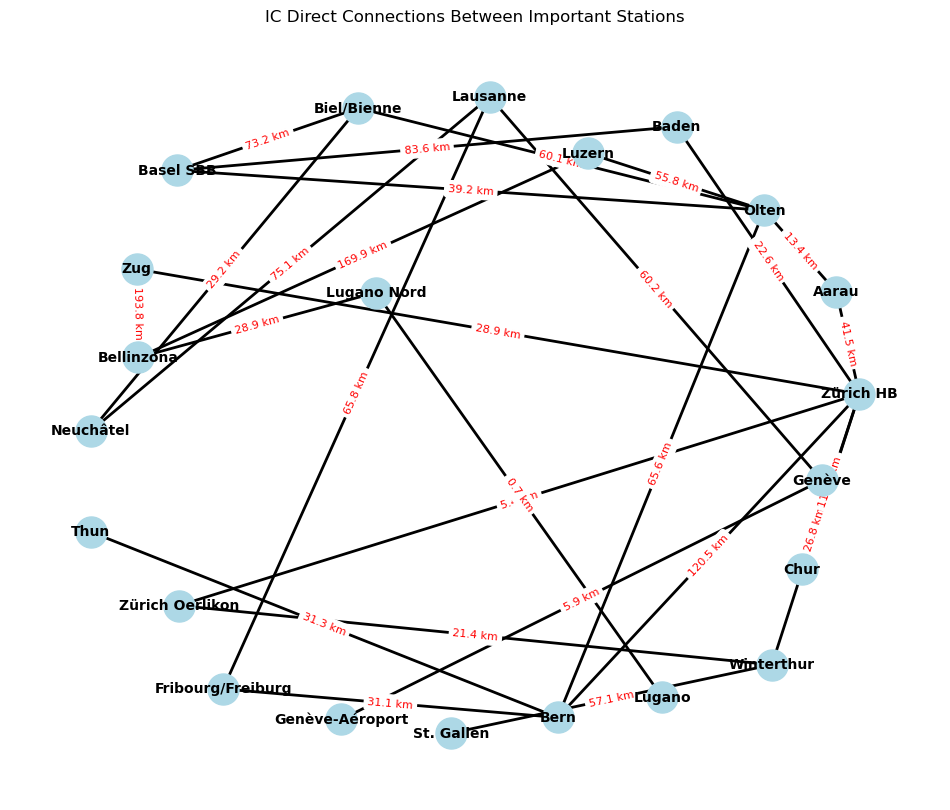

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

inv_weights = {
    (u, v): 1 / w if w > 0 else 0.001
    for u, v, w in H_ic.edges(data='weight')
}

nx.set_edge_attributes(H_ic, inv_weights, 'inv_weight')

pos = nx.spring_layout(H_ic, weight='inv_weight', seed=4)
plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(H_ic, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(H_ic, pos, width=2)
nx.draw_networkx_labels(H_ic, pos, font_size=10, font_weight='bold')

edge_labels = {
    (u, v): f"{w / 1000:.1f} km"
    for u, v, w in H_ic.edges(data='weight')
}
nx.draw_networkx_edge_labels(H_ic, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("IC Direct Connections Between Important Stations")
plt.axis('off')
plt.show()